# PyTorch  CNN 卷積神經網絡 - MNIST手寫數字辨識實作實例

### 參考文件
### https://pytorch.org/
### https://hackmd.io/@Kuo-Li-Chen/SJSdUwv65
### https://learn.microsoft.com/zh-tw/windows/ai/windows-ml/tutorials/pytorch-installation
### https://ithelp.ithome.com.tw/articles/10273722
### https://ithelp.ithome.com.tw/articles/10277163
### https://rowantseng.medium.com/pytorch-%E8%87%AA%E5%AE%9A%E7%BE%A9%E8%B3%87%E6%96%99%E9%9B%86-custom-dataset-7f9958a8ff15
### https://hackmd.io/@gianghoangcotai/Hkfk2AL_L
### https://www.learnpytorch.io/04_pytorch_custom_datasets/
### https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
### https://www.pytorchmaster.com/1-2%2C%E5%9B%BE%E7%89%87%E6%95%B0%E6%8D%AE%E5%BB%BA%E6%A8%A1%E6%B5%81%E7%A8%8B%E8%8C%83%E4%BE%8B/
### https://www.cnblogs.com/chenhuabin/p/17026018.html
### https://medium.com/ching-i/pytorch-%E5%9F%BA%E6%9C%AC%E4%BB%8B%E7%B4%B9%E8%88%87%E6%95%99%E5%AD%B8-ac0e1ebfd7ec
### https://datawhalechina.github.io/thorough-pytorch/%E7%AC%AC%E4%BA%94%E7%AB%A0/5.1%20PyTorch%E6%A8%A1%E5%9E%8B%E5%AE%9A%E4%B9%89%E7%9A%84%E6%96%B9%E5%BC%8F.html
### https://datawhalechina.github.io/thorough-pytorch/%E7%AC%AC%E4%B8%89%E7%AB%A0/3.1%20%E6%80%9D%E8%80%83%EF%BC%9A%E5%AE%8C%E6%88%90%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E7%9A%84%E5%BF%85%E8%A6%81%E9%83%A8%E5%88%86.html
### https://datawhalechina.github.io/thorough-pytorch/%E7%AC%AC%E4%B8%89%E7%AB%A0/3.4%20%E6%A8%A1%E5%9E%8B%E6%9E%84%E5%BB%BA.html
### https://pytorch-cn.readthedocs.io/zh/latest/package_references/torch-nn/#_1
### https://blog.51cto.com/u_11299290/4685776
### https://wizardforcel.gitbooks.io/learn-dl-with-pytorch-liaoxingyu/content/5.1.html
### https://ithelp.ithome.com.tw/articles/10279986?sc=iThomeR
### https://hackmd.io/@lido2370/SJMPbNnKN?type=view
### https://github.com/maticvl/dataHacker
### https://github.com/XavierJiezou/pytorch-cnn-mnist

## 實作實例1

In [89]:
import numpy as np
from matplotlib import pyplot as plt
from torchvision import datasets, transforms

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

#import helper
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# moves your model to train on your gpu if available else it uses your cpu
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [90]:
# Define transform to normalize data
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))
                                ])



# Download and load the training data
train_set = datasets.MNIST('DATA_MNIST/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)

test_set = datasets.MNIST('DATA_MNIST/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [91]:
training_data = enumerate(trainloader)
batch_idx, (images, labels) = next(training_data)
print(type(images)) # Checking the datatype 
print(images.shape) # the size of the image
print(labels.shape) # the size of the labels

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


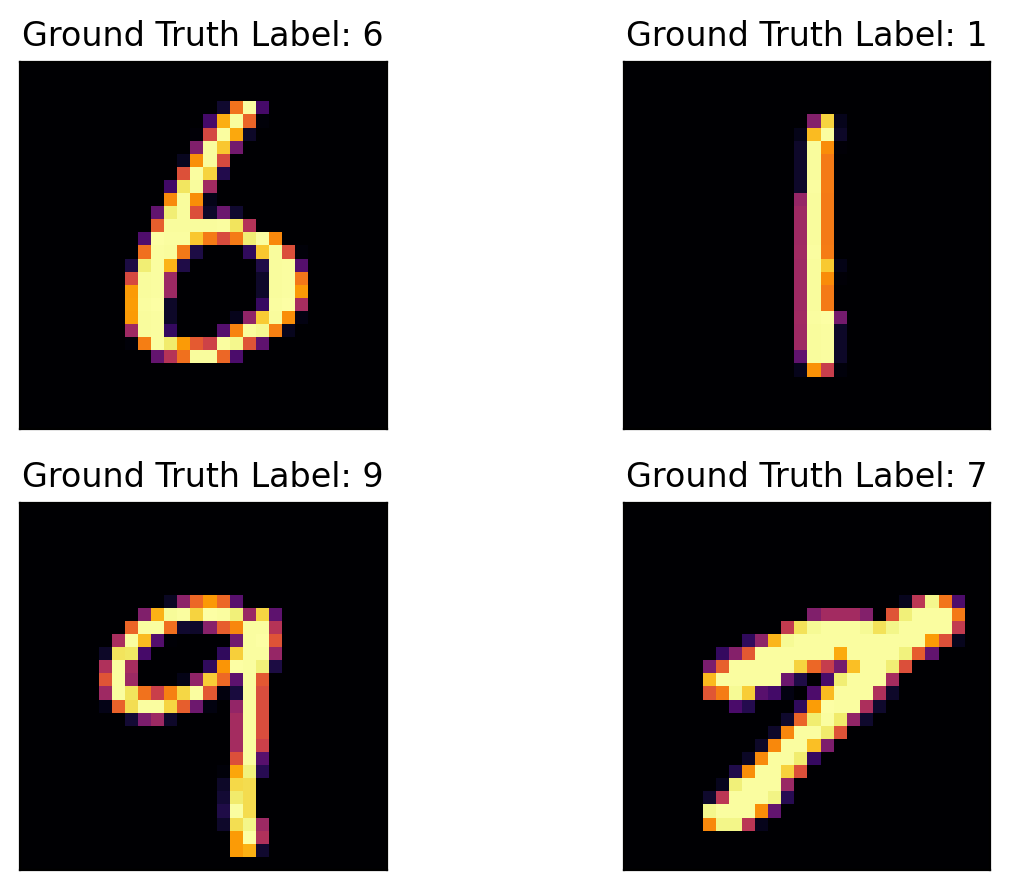

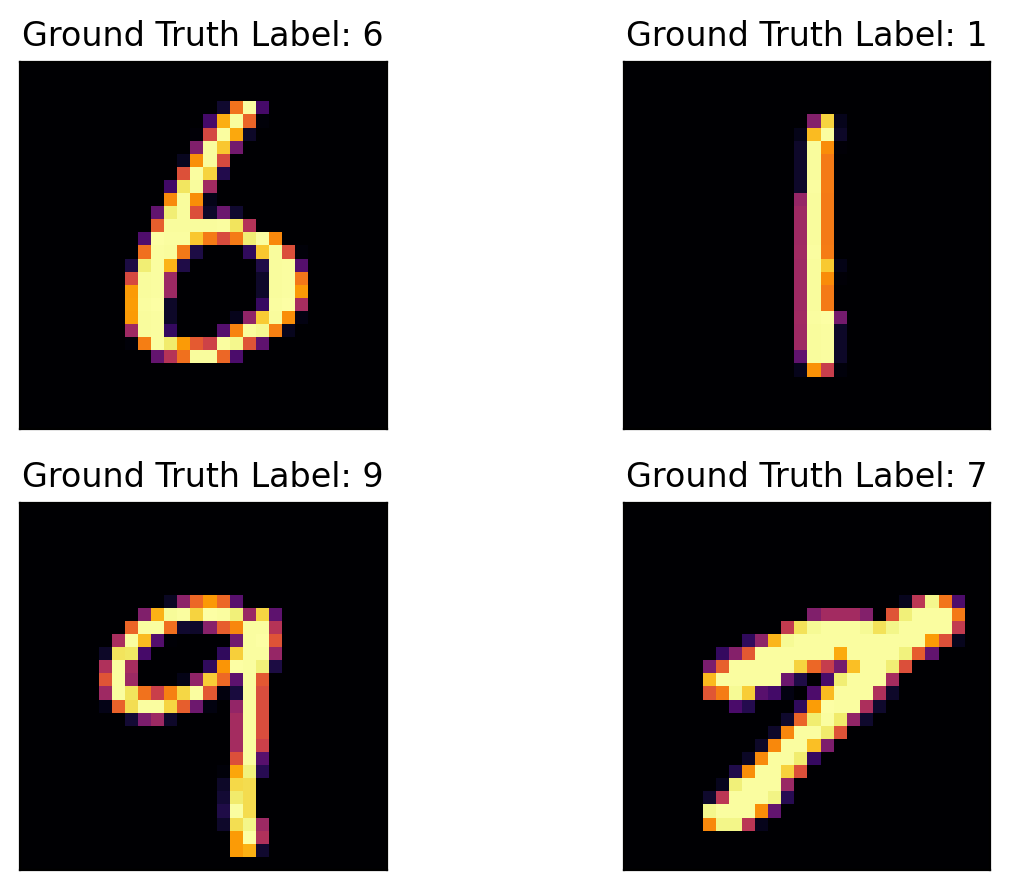

In [92]:
fig = plt.figure()
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    plt.imshow(images[i][0], cmap='inferno')
    plt.title("Ground Truth Label: {}".format(labels[i]))
    plt.yticks([])
    plt.xticks([])
fig

In [93]:
class Network(nn.Module):

    def __init__(self):
        super(Network, self).__init__()
        # Convolutional Neural Network Layer 
        self.convolutaional_neural_network_layers = nn.Sequential(
                # Here we are defining our 2D convolutional layers
                # We can calculate the output size of each convolutional layer using the following formular
                # outputOfEachConvLayer = [(in_channel + 2*padding - kernel_size) / stride] + 1
                # We have in_channels=1 because our input is a grayscale image
                nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, padding=1, stride=1), # (N, 1, 28, 28) 
                nn.ReLU(),
                # After the first convolutional layer the output of this layer is:
                # [(28 + 2*1 - 3)/1] + 1 = 28. 
                nn.MaxPool2d(kernel_size=2), 
                # Since we applied maxpooling with kernel_size=2 we have to divide by 2, so we get
                # 28 / 2 = 14
          
                # output of our second conv layer
                nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1, stride=1),
                nn.ReLU(),
                # After the second convolutional layer the output of this layer is:
                # [(14 + 2*1 - 3)/1] + 1 = 14. 
                nn.MaxPool2d(kernel_size=2) 
                # Since we applied maxpooling with kernel_size=2 we have to divide by 2, so we get
                # 14 / 2 = 7
        )

        # Linear layer
        self.linear_layers = nn.Sequential(
                # We have the output_channel=24 of our second conv layer, and 7*7 is derived by the formular 
                # which is the output of each convolutional layer
                nn.Linear(in_features=24*7*7, out_features=64),          
                nn.ReLU(),
                nn.Dropout(p=0.2), # Dropout with probability of 0.2 to avoid overfitting
                nn.Linear(in_features=64, out_features=10) # The output is 10 which should match the size of our class
        )

    # Defining the forward pass 
    def forward(self, x):
        x = self.convolutaional_neural_network_layers(x)
        # After we get the output of our convolutional layer we must flatten it or rearrange the output into a vector
        x = x.view(x.size(0), -1)
        # Then pass it through the linear layer
        x = self.linear_layers(x)
        # The softmax function returns the prob likelihood of getting the input image. 
        # We will see a much graphical demonstration below
        x = F.log_softmax(x, dim=1)
        return x

In [94]:
model = Network()
model.to(device)
print(model)

Network(
  (convolutaional_neural_network_layers): Sequential(
    (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1176, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [95]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [96]:
epochs = 10 # The total number of iterations

train_losses = []
test_losses = []

for epoch in range(epochs):
    # prep model for training
    model.train()
    train_loss = 0

    for idx, (images, labels) in enumerate(trainloader): 

        # Send these >>> To GPU
        images = images.to(device)
        labels = labels.to(device)

        # Training pass
        optimizer.zero_grad()

        # Forward pass
        output = model(images)
        loss = criterion(output, labels)

        #Backward pass
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        
    else:
        # prep model for evaluation
        model.eval() 
        test_loss = 0
        accuracy = 0

        # Turn off the gradients when performing validation.
        # If we don't turn it off, we will comprise our networks weight entirely
        with torch.no_grad():
            for images, labels in testloader:
                
                images = images.to(device)
                labels = labels.to(device)
                
                log_probabilities = model(images)
                test_loss += criterion(log_probabilities, labels)

                probabilities = torch.exp(log_probabilities)
                top_prob, top_class = probabilities.topk(1, dim=1)
                predictions = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(predictions.type(torch.FloatTensor))
        
        train_losses.append(train_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch: {}/{}  ".format(epoch+1, epochs),
              "Training loss: {:.4f}  ".format(train_loss/len(trainloader)),
              "Testing loss: {:.4f}  ".format(test_loss/len(testloader)),
              "Test accuracy: {:.4f}  ".format(accuracy/len(testloader)))

Epoch: 1/10   Training loss: 0.6747   Testing loss: 0.2238   Test accuracy: 0.9340  
Epoch: 2/10   Training loss: 0.2220   Testing loss: 0.1286   Test accuracy: 0.9605  
Epoch: 3/10   Training loss: 0.1579   Testing loss: 0.0954   Test accuracy: 0.9706  
Epoch: 4/10   Training loss: 0.1275   Testing loss: 0.0864   Test accuracy: 0.9724  
Epoch: 5/10   Training loss: 0.1086   Testing loss: 0.0782   Test accuracy: 0.9767  
Epoch: 6/10   Training loss: 0.0953   Testing loss: 0.0674   Test accuracy: 0.9794  
Epoch: 7/10   Training loss: 0.0853   Testing loss: 0.0561   Test accuracy: 0.9820  
Epoch: 8/10   Training loss: 0.0775   Testing loss: 0.0513   Test accuracy: 0.9832  
Epoch: 9/10   Training loss: 0.0719   Testing loss: 0.0491   Test accuracy: 0.9840  
Epoch: 10/10   Training loss: 0.0666   Testing loss: 0.0444   Test accuracy: 0.9853  


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

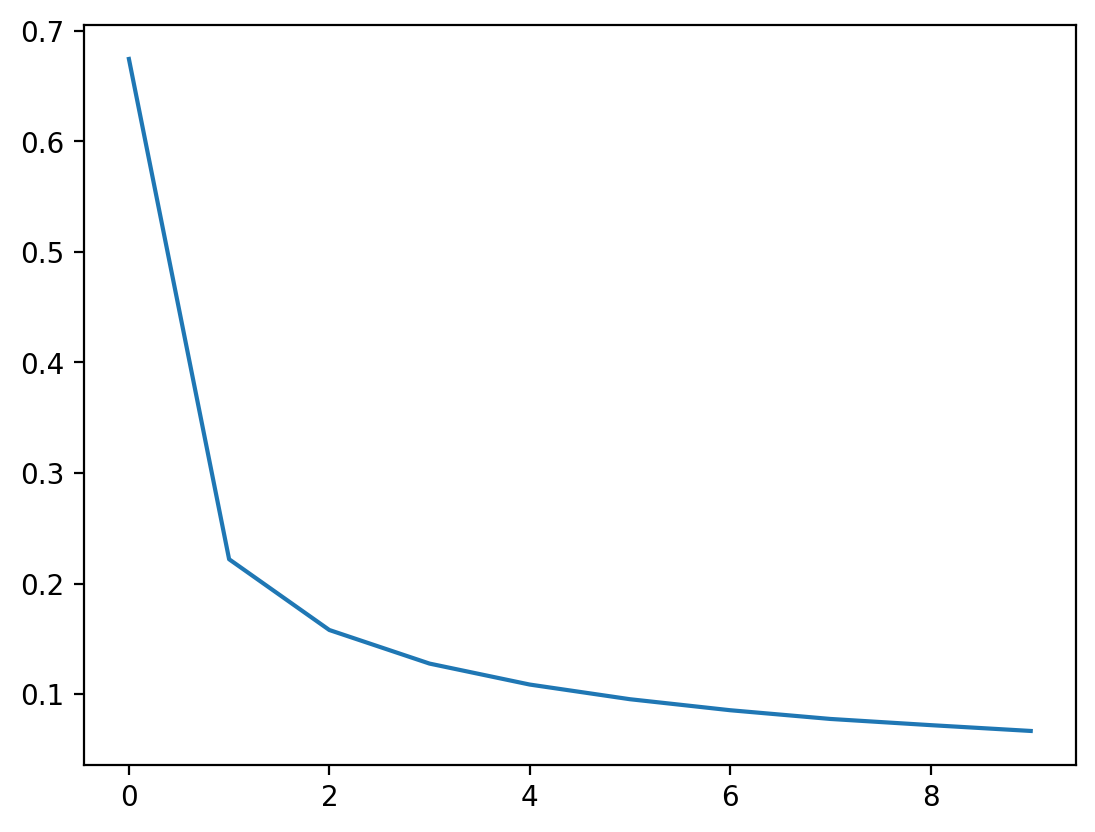

In [97]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.legend()
plt.grid()

In [ ]:
img = images[15]
img = img.to(device)
img = img.view(-1, 1, 28, 28)
print(img.shape)

# Since we want to use the already pretrained weights to make some prediction
# we are turning off the gradients
with torch.no_grad():
    logits = model.forward(img)

In [ ]:
# We take the softmax for probabilites since our outputs are logits
probabilities = F.softmax(logits, dim=1).detach().cpu().numpy().squeeze()

print(probabilities)

fig, (ax1, ax2) = plt.subplots(figsize=(6,8), ncols=2)
ax1.imshow(img.view(1, 28, 28).detach().cpu().numpy().squeeze(), cmap='inferno')
ax1.axis('off')
ax2.barh(np.arange(10), probabilities, color='r' )
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)

plt.tight_layout()

## 使用小畫家，寫0~9，實際測試看看

In [ ]:
#conda  install scikit-image imageio numpy scipy
!pip install --upgrade scikit-image imageio numpy scipy

In [60]:
!pip install plotly

In [110]:
# 使用小畫家，寫0~9，實際測試看看
from skimage import io
#from skimage.transform import resize
import numpy as np
import plotly.express as px
from skimage import color
from PIL import Image

uploaded_file = './test/3.png'
image1 = io.imread(uploaded_file)
image1

#0黑,255白

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [8, 8, 8],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [111]:
#
img = Image.open(uploaded_file).convert('L')
img = transforms.ToTensor()(img)
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.2824, 0.8745, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.8745,
          0.4078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [112]:
image1.shape

(28, 28, 3)

In [113]:
px.imshow(image1)

In [114]:
#imgGray = color.rgb2gray(image1)

#io.imshow(imgGray)

In [115]:
#imgGray.shape

In [116]:
#imgGray
#0黑,1白

In [117]:
#28X28=784變成 1列
#X1 = imgGray.reshape(1,28, 28, 1)
#X1.shape


In [118]:
#顛倒黑白==>0白,1黑
#X1 = np.abs(1-X1)

In [121]:
#X1 = np.float32(X1)
#img = torch.from_numpy(X1) 
img = img.to(device)
img = img.view(-1, 1, 28, 28)
print(img.shape)

# Since we want to use the already pretrained weights to make some prediction
# we are turning off the gradients
with torch.no_grad():
    logits = model.forward(img)

torch.Size([1, 1, 28, 28])


In [120]:
# Save the model checkpoint
torch.save(model.state_dict(), 'testcnnModel.ckpt')

## 實作實例2

torch.Size([60000, 28, 28])
torch.Size([60000])


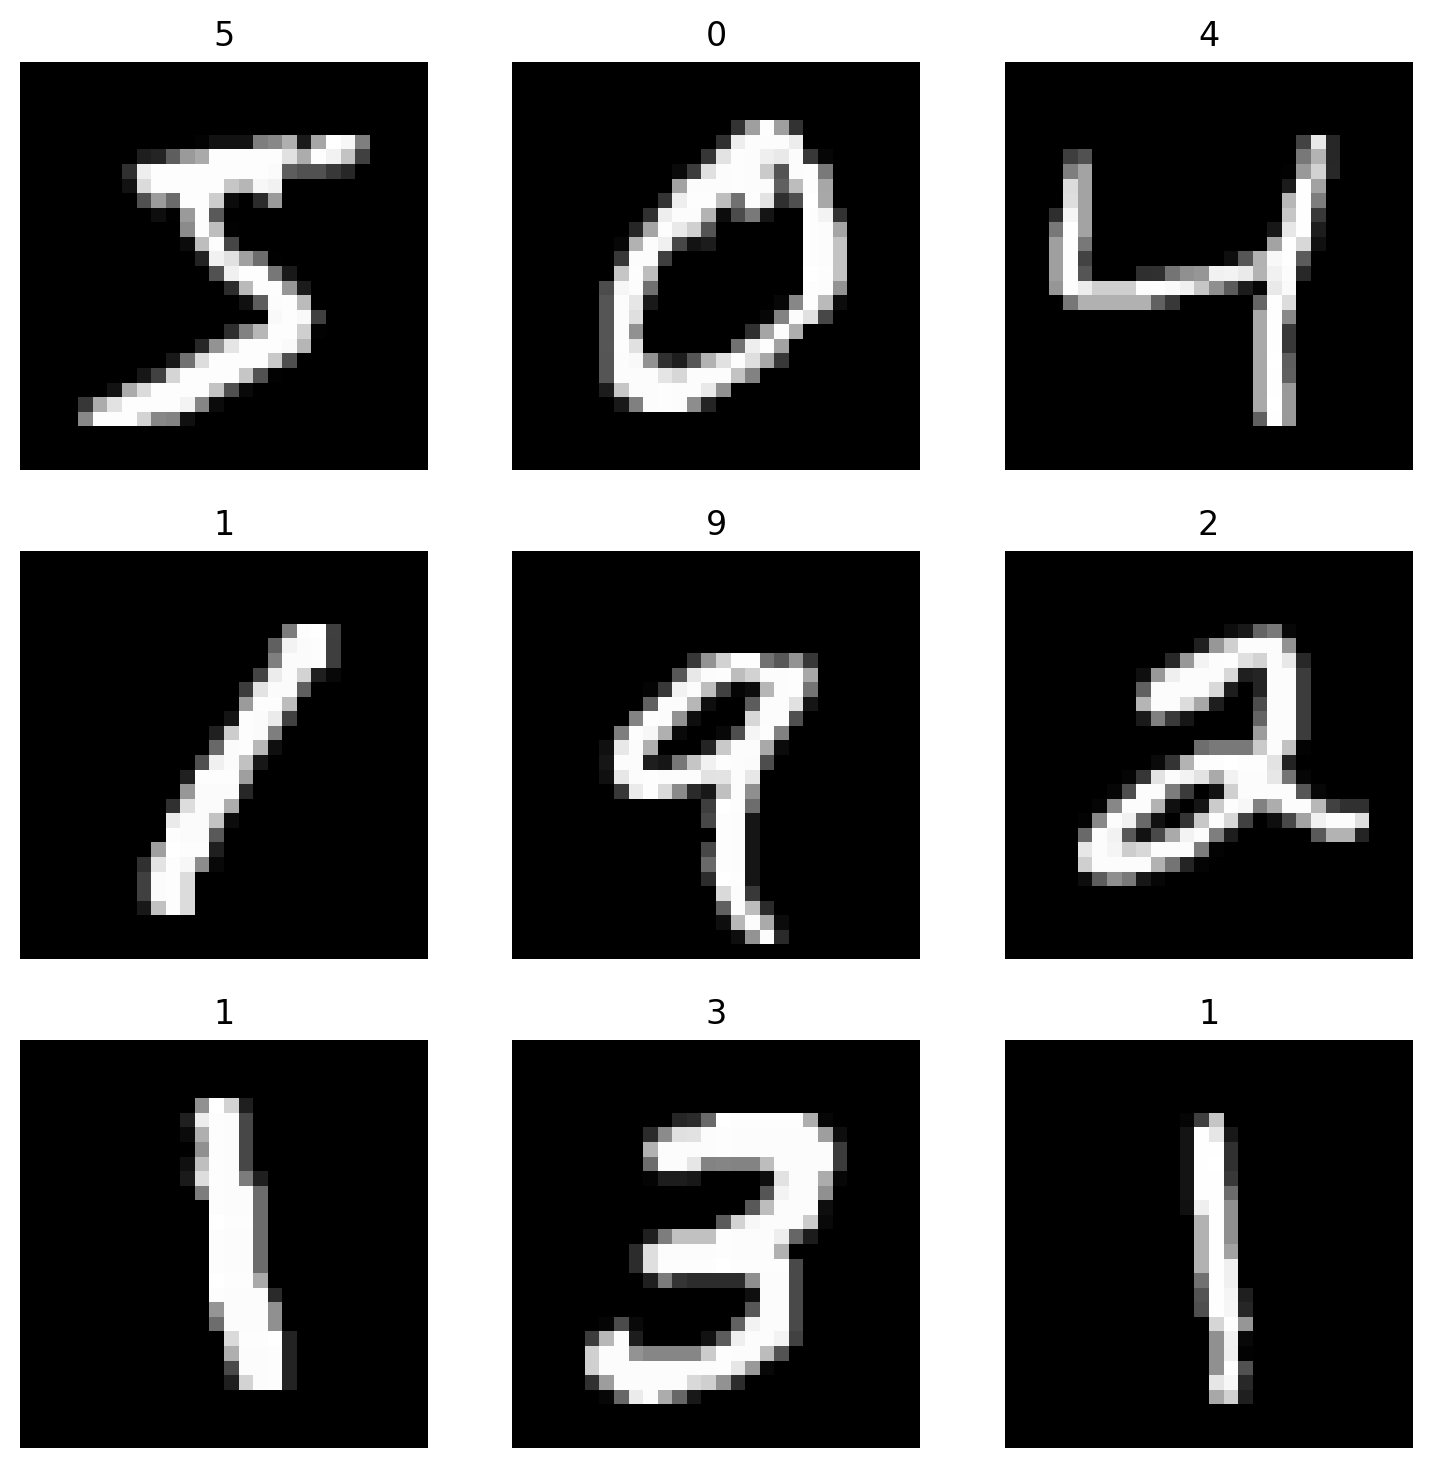

torch.Size([10000, 28, 28])
torch.Size([10000])


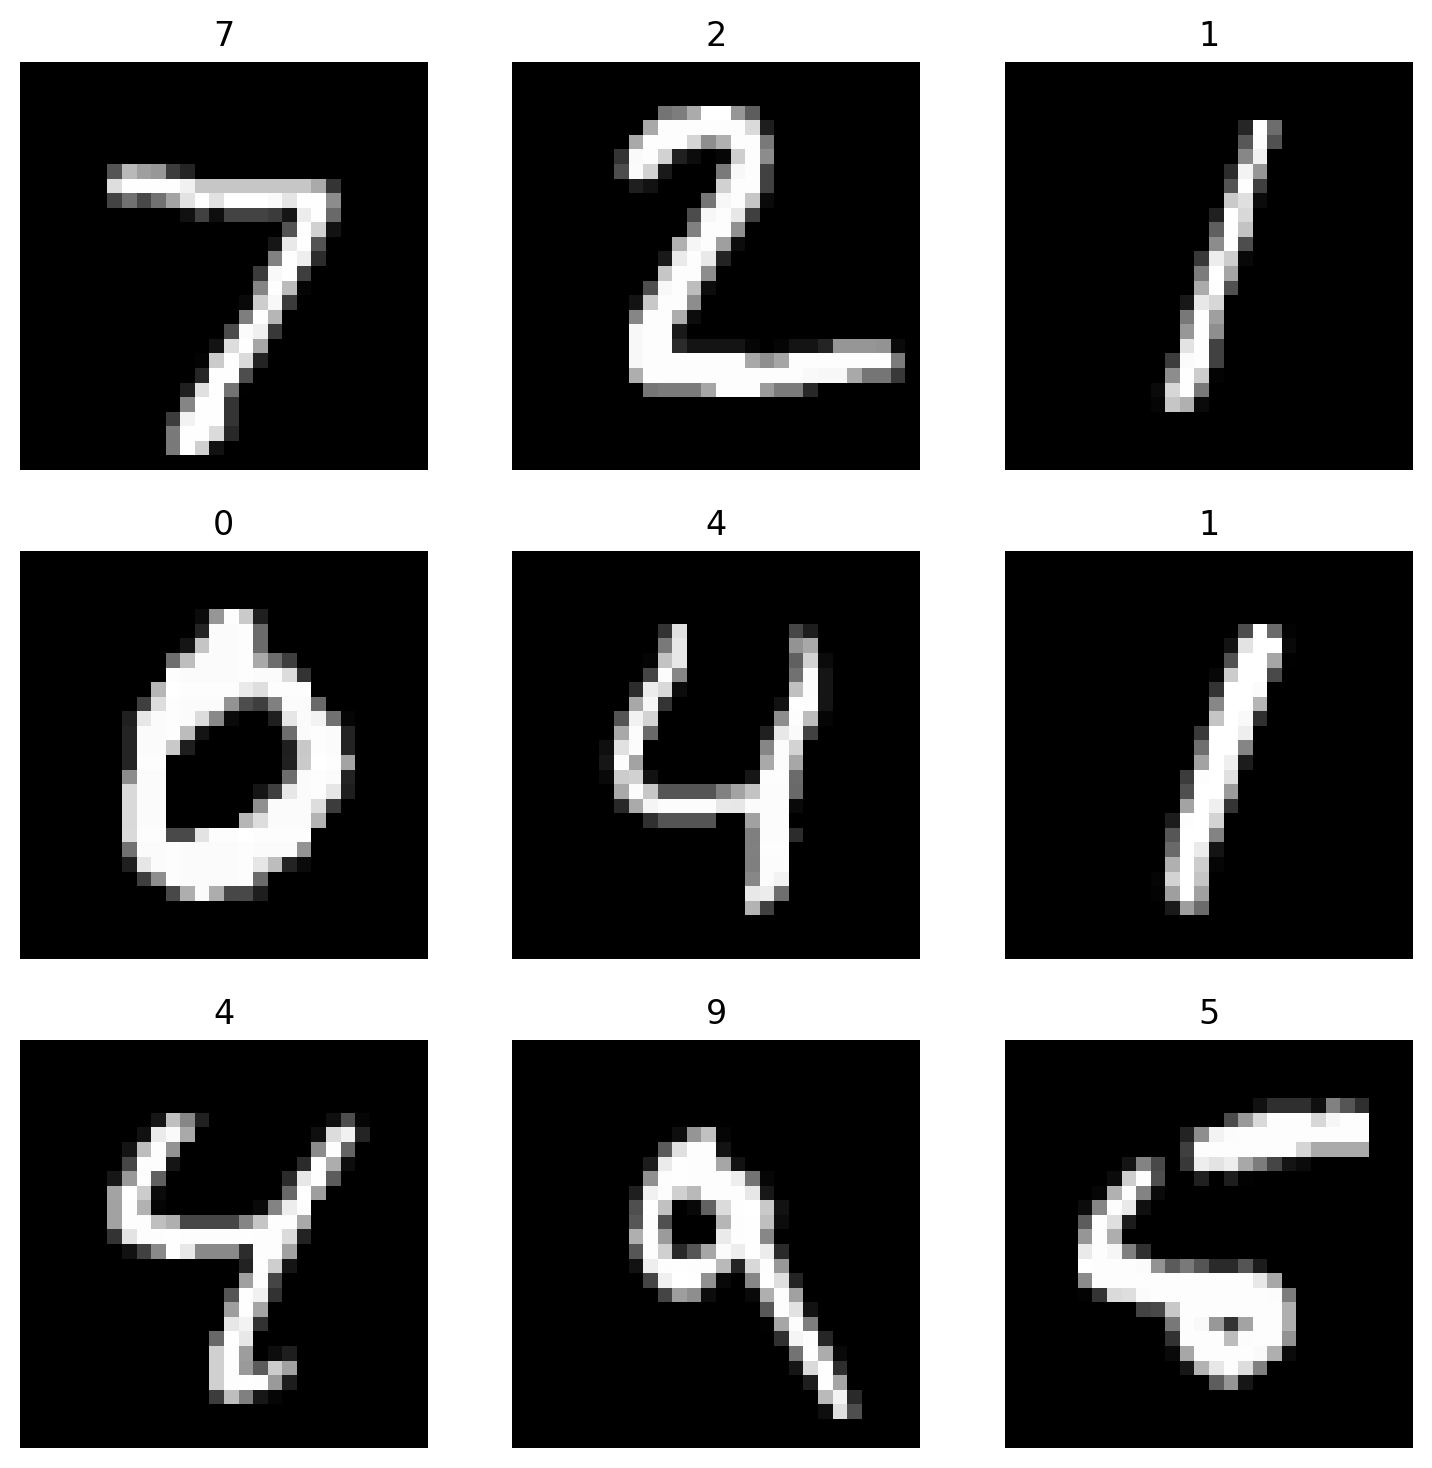

EPOCH: 01/30 STEP: 469/469 LOSS: 0.0301 ACC: 0.7422LOSS: 0.0600 ACC: 0.9817 VAL-LOSS: 0.0592 VAL-ACC: 0.9804 TOTAL-TIME: 13
EPOCH: 02/30 STEP: 469/469 LOSS: 0.0285 ACC: 0.7422LOSS: 0.0482 ACC: 0.9845 VAL-LOSS: 0.0445 VAL-ACC: 0.9847 TOTAL-TIME: 13
EPOCH: 03/30 STEP: 469/469 LOSS: 0.0104 ACC: 0.7500LOSS: 0.0342 ACC: 0.9888 VAL-LOSS: 0.0384 VAL-ACC: 0.9867 TOTAL-TIME: 13
EPOCH: 04/30 STEP: 469/469 LOSS: 0.0357 ACC: 0.7344LOSS: 0.0191 ACC: 0.9946 VAL-LOSS: 0.0262 VAL-ACC: 0.9908 TOTAL-TIME: 13
EPOCH: 05/30 STEP: 469/469 LOSS: 0.0393 ACC: 0.7422LOSS: 0.0159 ACC: 0.9950 VAL-LOSS: 0.0294 VAL-ACC: 0.9900 TOTAL-TIME: 13
EPOCH: 06/30 STEP: 469/469 LOSS: 0.0084 ACC: 0.7500LOSS: 0.0153 ACC: 0.9954 VAL-LOSS: 0.0282 VAL-ACC: 0.9905 TOTAL-TIME: 13
EPOCH: 07/30 STEP: 469/469 LOSS: 0.0018 ACC: 0.7500LOSS: 0.0115 ACC: 0.9965 VAL-LOSS: 0.0318 VAL-ACC: 0.9901 TOTAL-TIME: 13
EPOCH: 08/30 STEP: 469/469 LOSS: 0.0021 ACC: 0.7500LOSS: 0.0127 ACC: 0.9960 VAL-LOSS: 0.0277 VAL-ACC: 0.9909 TOTAL-TIME: 13
EPOCH: 0

'\ntensorboard --logdir=./logs/ --port 9000\n'

In [103]:
#%% 导入模块
import time
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

#from torch.utils.tensorboard import SummaryWriter
#%% tensorboard
#writer = SummaryWriter('./logs/')

#%% 训练设备
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#%% 参数定义
EPOCH = 30
BATCH_SIZE = 128
LR = 1E-3
#%% 下载数据集
train_file = datasets.MNIST(
    root='./dataset/',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)
test_file = datasets.MNIST(
    root='./dataset/',
    train=False,
    transform=transforms.ToTensor()
)
#%% 数据可视化
##% 训练数据可视化
train_data = train_file.data
train_targets = train_file.targets
print(train_data.size())  # [60000, 28, 28]
print(train_targets.size())  # [60000]
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title(train_targets[i].numpy())
    plt.axis('off')
    plt.imshow(train_data[i], cmap='gray')
plt.show()
##% 测试数据可视化
test_data = test_file.data
test_targets = test_file.targets
print(test_data.size())  # [10000, 28, 28]
print(test_targets.size())  # [10000]
plt.figure(figsize=(9, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title(test_targets[i].numpy())
    plt.axis('off')
    plt.imshow(test_data[i], cmap='gray')
plt.show()
#%% 制作数据加载器
train_loader = DataLoader(
    dataset=train_file,
    batch_size=BATCH_SIZE,
    shuffle=True
)
test_loader = DataLoader(
    dataset=test_file,
    batch_size=BATCH_SIZE,
    shuffle=False
)
#%% 模型结构
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            # [BATCH_SIZE, 1, 28, 28]
            nn.Conv2d(1, 32, 5, 1, 2),
            # [BATCH_SIZE, 32, 28, 28]
            nn.ReLU(),
            nn.MaxPool2d(2),
            # [BATCH_SIZE, 32, 14, 14]
            nn.Conv2d(32, 64, 5, 1, 2),
            # [BATCH_SIZE, 64, 14, 14]
            nn.ReLU(),
            nn.MaxPool2d(2),
            # [BATCH_SIZE, 64, 7, 7]
        )
        self.fc = nn.Linear(64 * 7 * 7, 10)

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        y = self.fc(x)
        return y
#%% 创建模型
model = CNN().to(device)
optim = torch.optim.Adam(model.parameters(), LR)
lossf = nn.CrossEntropyLoss()
#%% 定义计算整个训练集或测试集loss及acc的函数
def calc(data_loader):
    loss = 0
    total = 0
    correct = 0
    with torch.no_grad():
        for data, targets in data_loader:
            data = data.to(device)
            targets = targets.to(device)
            output = model(data)
            loss += lossf(output, targets)
            correct += (output.argmax(1) == targets).sum()
            total += data.size(0)
    loss = loss.item()/len(data_loader)
    acc = correct.item()/total
    return loss, acc
#%% 训练过程打印函数
def show():
    # 定义全局变量
    if epoch == 0:
        global model_saved_list
        global temp
        temp = 0
    # 打印训练的EPOCH和STEP信息
    header_list = [
        f'EPOCH: {epoch+1:0>{len(str(EPOCH))}}/{EPOCH}',
        f'STEP: {step+1:0>{len(str(len(train_loader)))}}/{len(train_loader)}'
    ]
    header_show = ' '.join(header_list)
    print(header_show, end=' ')
    # 打印训练的LOSS和ACC信息
    loss, acc = calc(train_loader)
    #writer.add_scalar('loss', loss, epoch+1)
    #writer.add_scalar('acc', acc, epoch+1)
    train_list = [
        f'LOSS: {loss:.4f}',
        f'ACC: {acc:.4f}'
    ]
    train_show = ' '.join(train_list)
    print(train_show, end=' ')
    # 打印测试的LOSS和ACC信息
    val_loss, val_acc = calc(test_loader)
    #writer.add_scalar('val_loss', val_loss, epoch+1)
    #writer.add_scalar('val_acc', val_acc, epoch+1)
    test_list = [
        f'VAL-LOSS: {val_loss:.4f}',
        f'VAL-ACC: {val_acc:.4f}'
    ]
    test_show = ' '.join(test_list)
    print(test_show, end=' ')
    # 保存最佳模型
    if val_acc > temp:
        model_saved_list = header_list+train_list+test_list
        torch.save(model.state_dict(), 'model.pt')
        temp = val_acc
#%% 训练模型
for epoch in range(EPOCH):
    start_time = time.time()
    for step, (data, targets) in enumerate(train_loader):
        optim.zero_grad()
        data = data.to(device)
        targets = targets.to(device)
        output = model(data)
        loss = lossf(output, targets)
        acc = (output.argmax(1) == targets).sum().item()/BATCH_SIZE
        loss.backward()
        optim.step()
        print(
            f'EPOCH: {epoch+1:0>{len(str(EPOCH))}}/{EPOCH}',
            f'STEP: {step+1:0>{len(str(len(train_loader)))}}/{len(train_loader)}',
            f'LOSS: {loss.item():.4f}',
            f'ACC: {acc:.4f}',
            end='\r'
        )
    show()
    end_time = time.time()
    print(f'TOTAL-TIME: {round(end_time-start_time)}')
#%% 打印并保存最优模型的信息
model_saved_show = ' '.join(model_saved_list)
print('| BEST-MODEL | '+model_saved_show)
with open('model.txt', 'a') as f:
    f.write(model_saved_show+'\n')
#%% tensorboard
'''
tensorboard --logdir=./logs/ --port 9000
'''


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


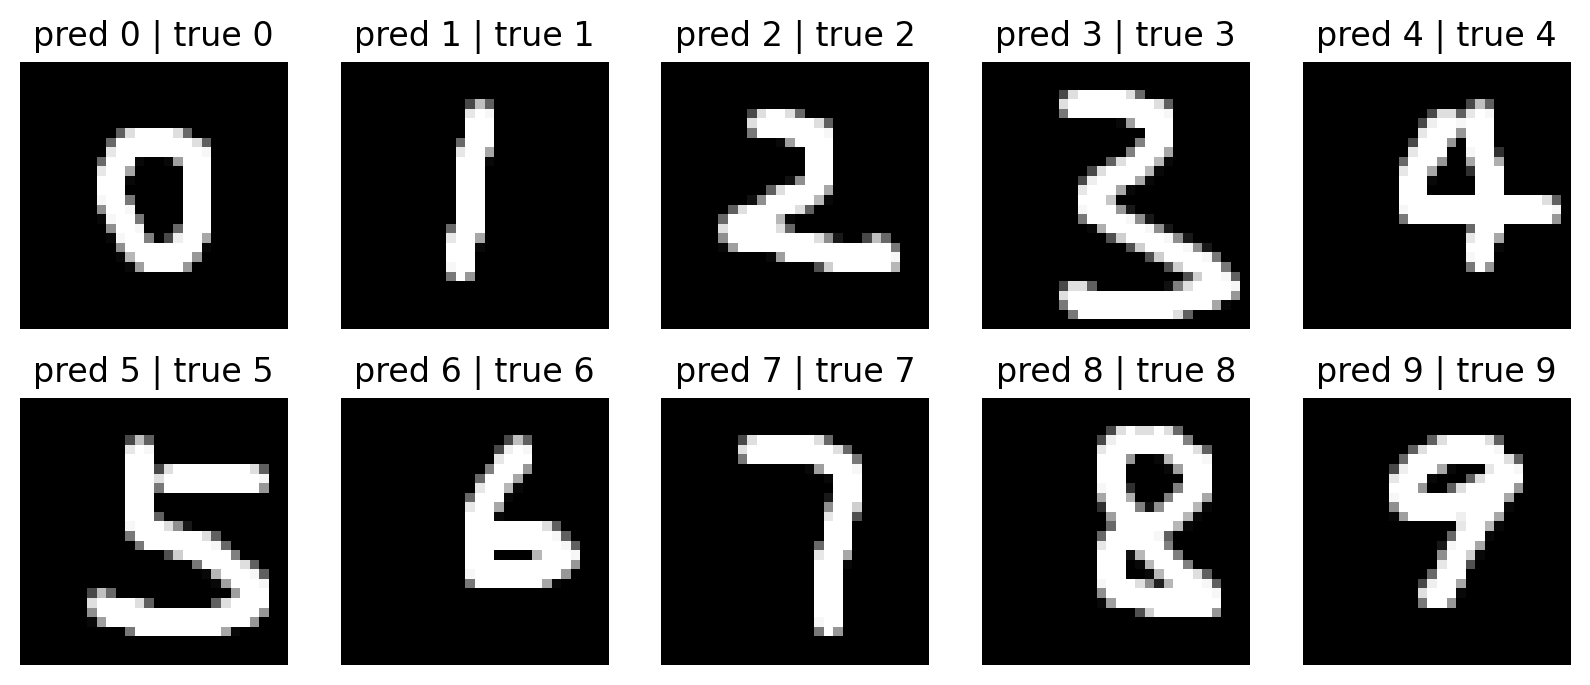

In [123]:
#%% 数据说明
'''
测试数据是用Windows上的画图软件手写的10个数字
'''
#%% 导入模块
import os
import torch
from PIL import Image
#from model import CNN
import matplotlib.pyplot as plt
from torchvision import transforms
#%% 数据准备
path = './test/'
imgs = []
labels = []
for name in sorted(os.listdir(path)):
    img = Image.open(path+name).convert('L')
    img = transforms.ToTensor()(img)
    imgs.append(img)
    labels.append(int(name[0]))
imgs = torch.stack(imgs, 0)
#%% 加载模型
model = CNN()
model.load_state_dict(torch.load('model.pt', map_location=torch.device('cpu')))
model.eval()
#%% 测试模型
with torch.no_grad():
    output = model(imgs)
#%% 打印结果
pred = output.argmax(1)
true = torch.LongTensor(labels)
print(pred)
print(true)
#%% 结果显示
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(f'pred {pred[i]} | true {true[i]}')
    plt.axis('off')
    plt.imshow(imgs[i].squeeze(0), cmap='gray')
plt.savefig('test.png')
plt.show()